#### Jeffrey Bradley, Taylor Tucker, Virginia Weston
#### Test 2
#### Prof. Watson
#### 10/20/2020

## Linear Regression Notebook
We will be using linear regression to predict chance of admission

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import scipy as sp
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
from sklearn.metrics import accuracy_score
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('CleanedData.csv')
columns = df.columns
columns

Index(['Unnamed: 0', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'SES Percentage', 'Asian',
       'african american', 'latinx', 'white', 'Chance of Admit'],
      dtype='object')

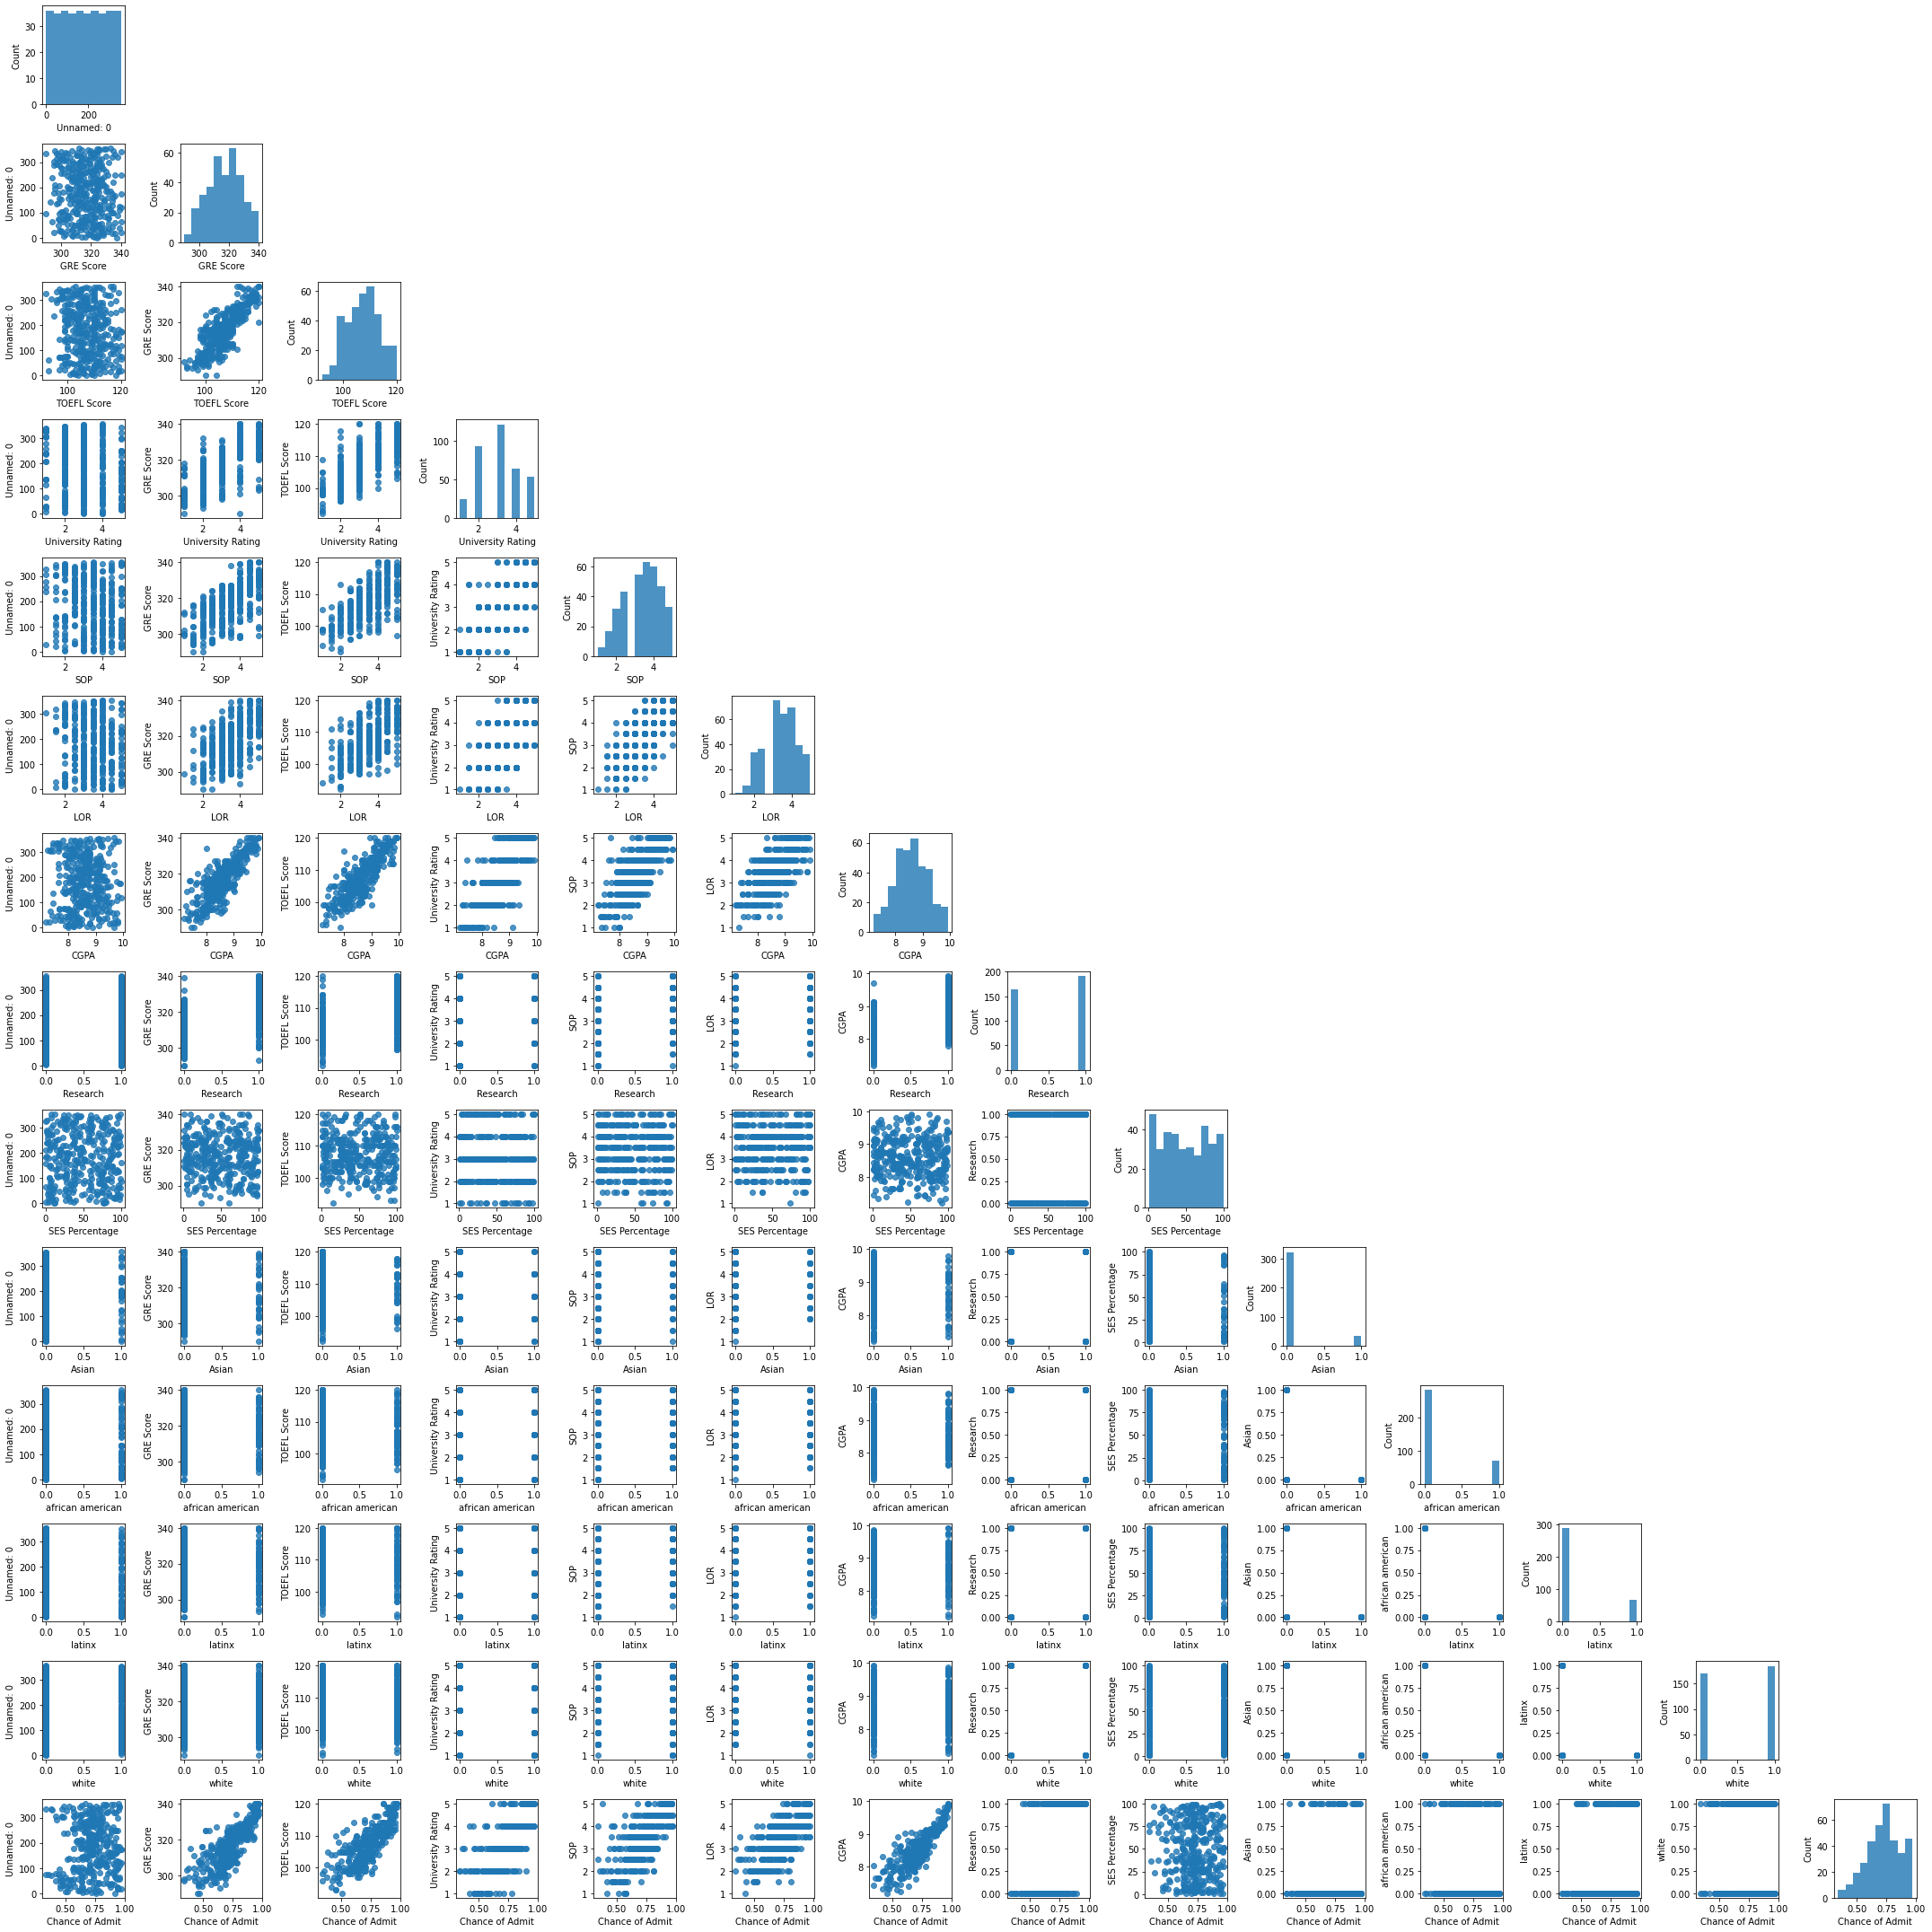

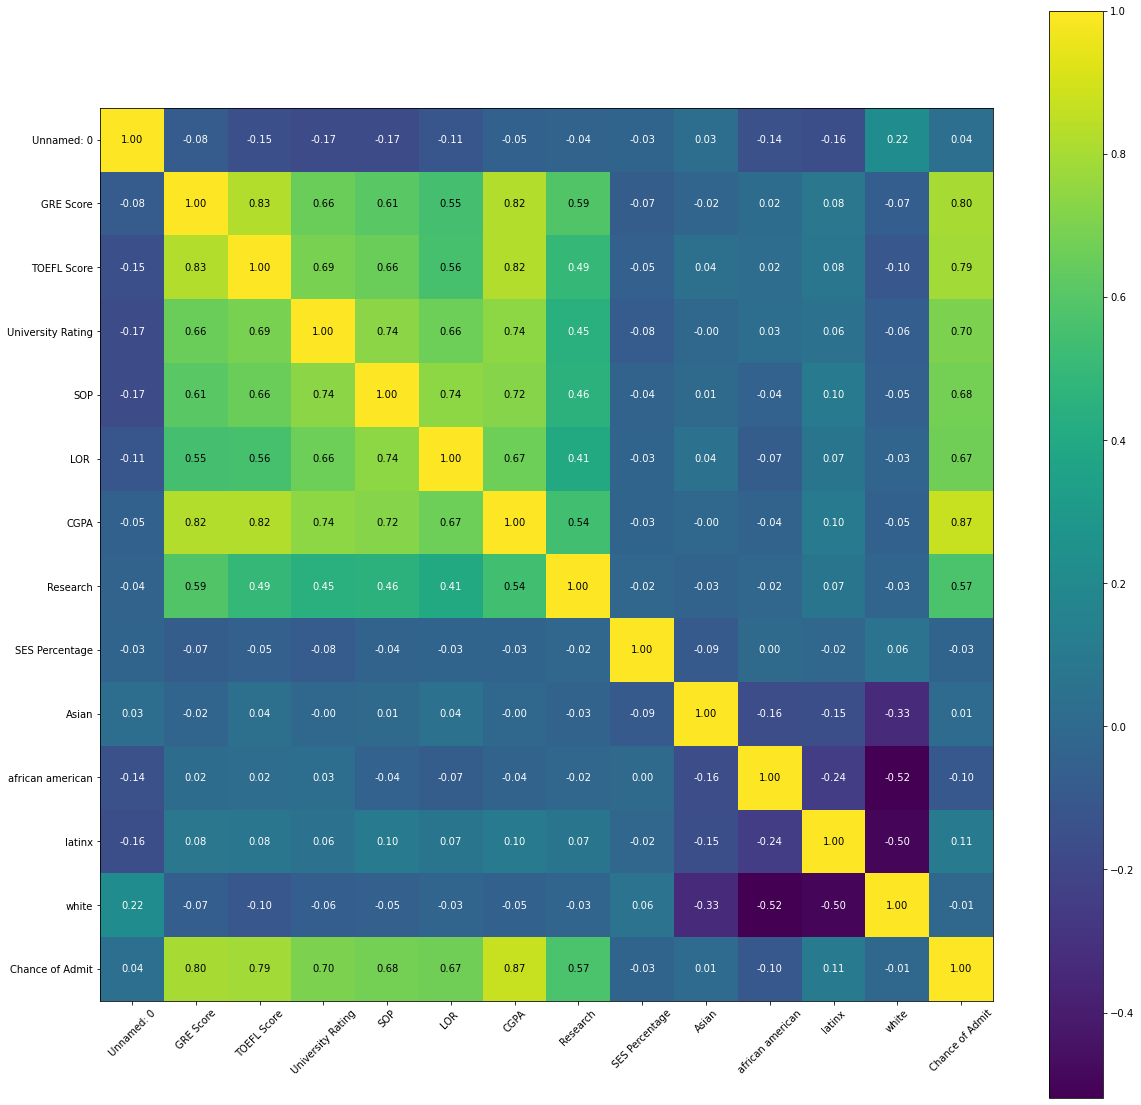

In [3]:
scatterplotmatrix(df[columns].values, figsize=(30, 30), names=columns, alpha=0.8)
plt.tight_layout()
plt.show()
# creating the correlating heatmap
corrmap = np.corrcoef(df[columns].values.T)
hmap = heatmap(corrmap, row_names=columns, column_names=columns, figsize=(20, 20))
plt.show()

Based on the above correlations, we can see which features are linearly correlated to chance of admission.
These features are GRE score, TOEFL Score, University Rating, SOP, LOR, CGPA, and research.

In [4]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
y = df['Chance of Admit']

# Without Scaling

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#### Lasso Regression

In [6]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)
print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
#print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (accuracy_score(y_train, y_train_pred), lasso.score(y_test, y_test_pred)))

[0.00753076 0.00355632 0.         0.         0.         0.
 0.        ]
MSE train: 0.006, test: 0.008
R^2 train: 0.694, test: 0.610


#### Ridge Regression

In [7]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)
print(ridge.coef_)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[ 0.00212387  0.00293947 -0.00188615 -0.00182996  0.02419595  0.10888304
  0.03299973]
MSE train: 0.003, test: 0.005
R^2 train: 0.821, test: 0.758


#### Linear Gradient Descent

In [8]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.00001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            print(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

97.31120000000001
15007464.870819952
2376226329681.9565
3.762429261222376e+17
5.957291933387237e+22
9.432556658373022e+27
1.4935162840480156e+33
2.364778682497029e+38
3.744303478255614e+43
5.928592236155149e+48
9.387114614698341e+53
1.4863211582017985e+59
2.3533861852067402e+64
3.726265017597215e+69
5.900030801850312e+74
9.341891491450868e+79
1.4791606954098107e+85
2.3420485721199853e+90
3.708313458565473e+95
5.8716069643808e+100


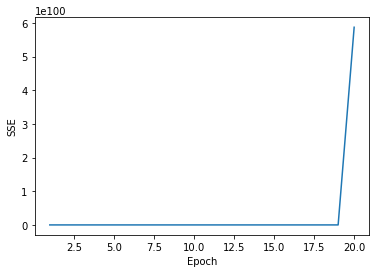

In [9]:
lr = LinearRegressionGD()
lr.fit(x, y)
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

#### Stacastic Gradient Descent

In [10]:
SGD = SGDRegressor()
SGD.fit(x_train, y_train)
y_train_pred = SGD.predict(x_train)
y_test_pred = SGD.predict(x_test)
print(SGD.coef_)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[ 7.51943455e+10  7.25887028e+11  1.28772136e+11  7.69276684e+10
 -2.91908991e+10  4.02968458e+10  9.22221694e+10]
MSE train: 10585170124905239120602726400.000, test: 10531604614535826089292333056.000
R^2 train: -554112088109866958015204163584.000, test: -503148177552770667230059823104.000


#### As you can see, for unscaled values gradient descent failed to find a global minimum, and Ridge Regression outperformed Lasso regression by having a lower MSE and higher correlation coefficient for the unscaled data.

# With Scaling

In [11]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.3)

#### Lasso Regression

In [13]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)
print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[0.09545395 0.11435242 0.         0.         0.11930048 0.53223082
 0.02027437]
MSE train: 0.204, test: 0.225
R^2 train: 0.802, test: 0.760


#### Ridge Regression

In [14]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)
print(ridge.coef_)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[ 0.12236993  0.15374733  0.00793381 -0.01141319  0.18078172  0.50673977
  0.07912514]
MSE train: 0.188, test: 0.225
R^2 train: 0.817, test: 0.760


In [15]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            print(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

177.99999999999994
113.6945909512013
78.77983950522824
59.756655480268414
49.33691166699631
43.583668252441576
40.36863006491755
38.53998457282407
37.47338323139397
36.829595988672764
36.423665701046154
36.154228776818215
35.96531061660047
35.82565555937259
35.71752894704649
35.630639331242975
35.5588308377754
35.49827613663429
35.44648371602767
35.401748131583275


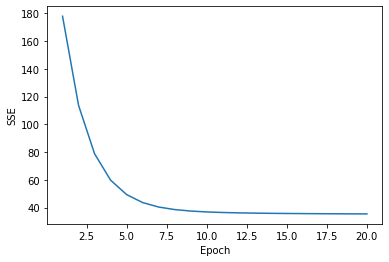

In [16]:
lr = LinearRegressionGD()
lr.fit(x_std, y_std)
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [17]:
SGD = SGDRegressor()
SGD.fit(x_train, y_train)
y_train_pred = SGD.predict(x_train)
y_test_pred = SGD.predict(x_test)
print(SGD.coef_)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[0.17767383 0.18263601 0.04309439 0.04305912 0.15473786 0.34415637
 0.08482941]
MSE train: 0.194, test: 0.223
R^2 train: 0.811, test: 0.762


### Now we want to try to see if using only the highest linearly correlated feature, CGPA score, will give us a better predictor.

#### Simple Linear Regression

In [18]:
lr = LinearRegression()

In [19]:
x = df[['CGPA']]
y = df['Chance of Admit']

In [20]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle =True)

In [21]:
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print(lr.coef_)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))


[0.20487929]
MSE train: 0.005, test: 0.005
R^2 train: 0.747, test: 0.780


##### Lastly, we wanted to try Polynomial Regression with all the linearly correlated features

#### Polynomial Regression

In [22]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
y = df['Chance of Admit']

In [23]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()


In [28]:
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
x_quad = quadratic.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_quad, y, test_size=0.3, shuffle =True)
pr.fit(x_train, y_train)
#y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

y_train_pred = pr.predict(x_train)
y_test_pred = pr.predict(x_test)
#print(pr.coef_)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 0.004, test: 0.004
R^2 train: 0.822, test: 0.743
